In [ ]:
!pip install xgboost lightgbm


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
train = pd.read_csv('OneDrive/Desktop/train.csv')
test = pd.read_csv('OneDrive/Desktop/test.csv')

In [3]:


print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train shape: (9021, 98)
Test shape: (10, 99)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9021 non-null   int64  
 1   D1                             9021 non-null   int64  
 2   D2                             9021 non-null   int64  
 3   D3                             9021 non-null   int64  
 4   D4                             9021 non-null   int64  
 5   D5                             9021 non-null   int64  
 6   D6                             9021 non-null   int64  
 7   D7                             9021 non-null   int64  
 8   D8                             9021 non-null   int64  
 9   D9                             9021 non-null   int64  
 10  E1                             7237 non-null   float64
 11  E10                            8015 non-null   float64
 12  E11                            8015 non-null   f

In [5]:
train.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

| Feature Group                       | Meaning                                | Description                                                                               |
| ----------------------------------- | -------------------------------------- | ----------------------------------------------------------------------------------------- |
| **`date_id`**                       | Trading Day Identifier                 | Unique ID for each trading day. Used for sorting, indexing, and time-based splits.        |
| **M***                              | Market Dynamics / Technical Indicators | Price/volume behavior, breadth indicators, moving averages, technical trend signals, etc. |
| **E***                              | Macro-Economic Indicators              | GDP growth, unemployment, inflation proxies, global macro conditions.                     |
| **I***                              | Interest Rate Features                 | Federal funds rate, Treasury yields, yield spreads, monetary policy indicators.           |
| **P***                              | Price / Valuation Metrics              | P/E ratio, earnings yield, dividend yield, CAPE-style measures, valuation ratios.         |
| **V***                              | Volatility Features                    | VIX index, realized volatility, rolling historical volatility.                            |
| **S***                              | Sentiment Features                     | Investor sentiment: news sentiment, surveys, options sentiment, risk appetite.            |
| **MOM***                            | Momentum Features                      | 1-month, 3-month, 12-month return momentum, RSI, technical momentum signals.              |
| **D***                              | Dummy / Binary Indicators              | Day of week, holiday flags, quarter-end/month-end, special event flags.                   |
| **`forward_returns`**               | Next-Day Returns                       | Actual 1-day forward S&P 500 return (train only).                                         |
| **`risk_free_rate`**                | Risk-Free Rate                         | Short-term interest rate (Fed Funds). Train only.                                         |
| **`market_forward_excess_returns`** | **Target Variable**                    | Forward return minus rolling 5-year mean, winsorized using MAD(4). Train only.            |


In [10]:
pd.set_option('display.max_columns', None)
train.head(20)
train.set_index("date_id")

,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
date_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,0,0,0,1,0,0,0,0,0,1.493117,0.174272,0.002315,0.002315,0.002315,0.002315,0.928241,-0.381781,-0.499285,0.087241,-0.689460,1.414128,1.469108,1.848055,0.035714,0.321429,0.024471,0.109229,-0.327450,0.999669,0.360780,0.732659,0.075066,0.457011,0.525397,0.703704,0.345238,0.385582,0.517770,-1.226535,-0.873949,-0.239594,0.082394,-1.163527,-0.720916,0.210979,0.457672,0.265873,0.085979,-1.522273,2.246416,0.304850,1.279428,-0.029177,0.054771,0.643849,0.512282,0.338624,2.126790,2.320867,-0.184049,0.097553,-1.524343,0.623016,0.067130,-0.810821,-0.069025,1.868031,1.877110,0.044312,0.362124,0.957672,0.886243,0.263976,-0.074093,0.156730,0.699735,-0.373982,0.370370,0.948413,0.808137,0.025794,0.345899,-0.346978,0.122685,0.359788,-0.251129,0.541005,0.208995,0.484788,0.717308,0.677249,-0.327455,0.083995,-0.380452,-0.000015,0.000151,-0.000477
9017,0,0,0,1,0,0,0,0,0,1.490889,0.173942,0.001984,0.001984,0.001984,0.001984,0.928571,-0.381927,-0.499494,0.086729,-0.558935,1.410120,1.466890,1.842600,0.035384,0.321098,0.024140,0.109098,-0.327458,1.000000,0.360450,0.696815,0.074735,0.463294,0.518749,0.699735,0.332011,0.371032,0.513565,-1.218650,-0.890325,-0.246998,0.124983,-1.195221,-0.723577,

In [31]:
pd.set_option('display.max_rows', None)
missing_values = train.isnull().mean()
miss_value_perc = missing_values * 100  

miss_value_perc_formatted = miss_value_perc.round(4).sort_values(ascending=False)

pd.DataFrame(miss_value_perc_formatted)


,0
E7,77.2531
V10,67.0547
S3,63.5517
M1,61.4899
M13,61.4123
M14,61.4123
M6,55.9029
V9,50.3159
S12,39.2085
M5,36.3929


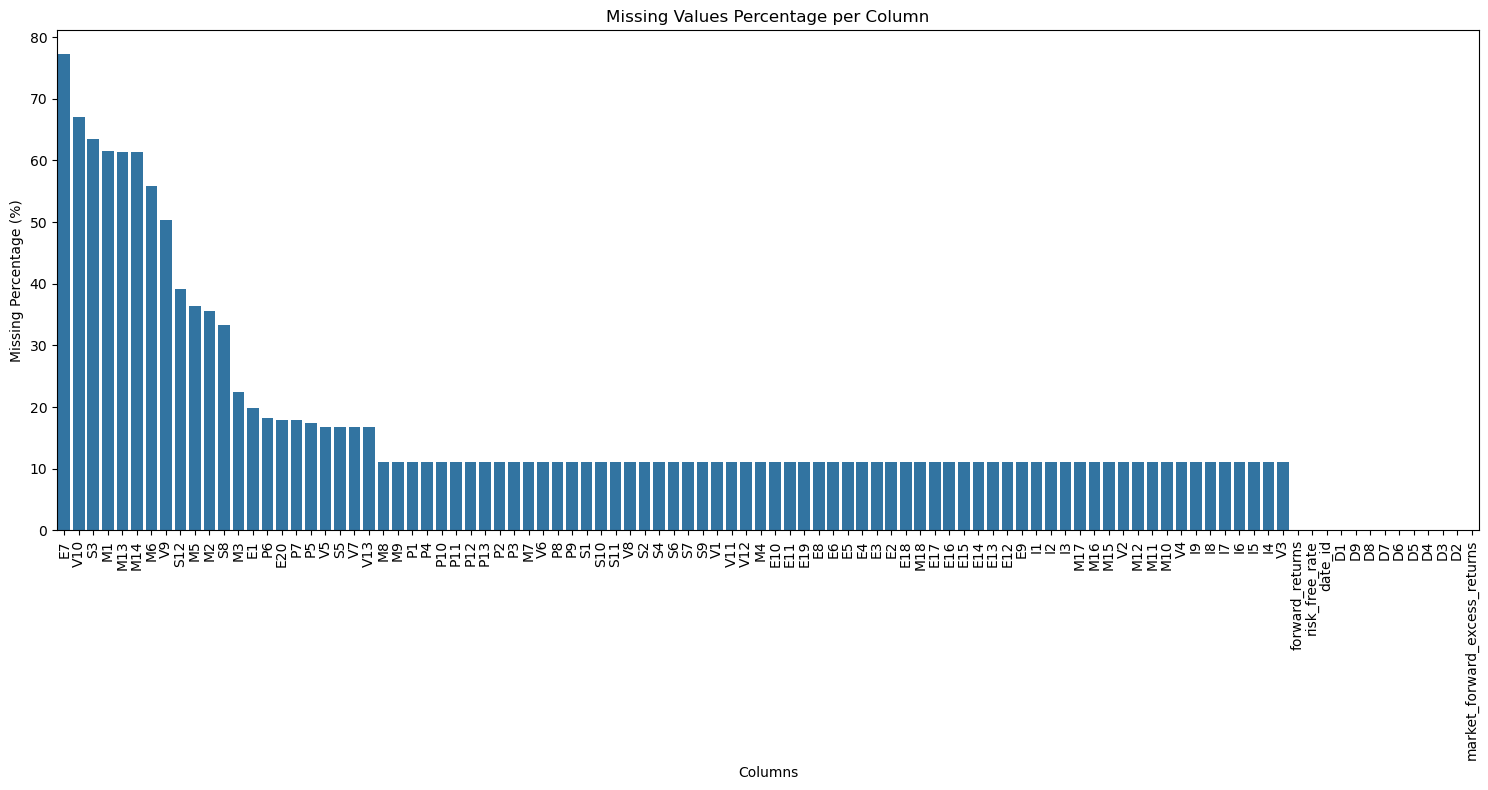

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x=miss_value_perc_formatted.index,y=miss_value_perc_formatted.values)

plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Values Percentage per Column")

plt.tight_layout()
plt.show()


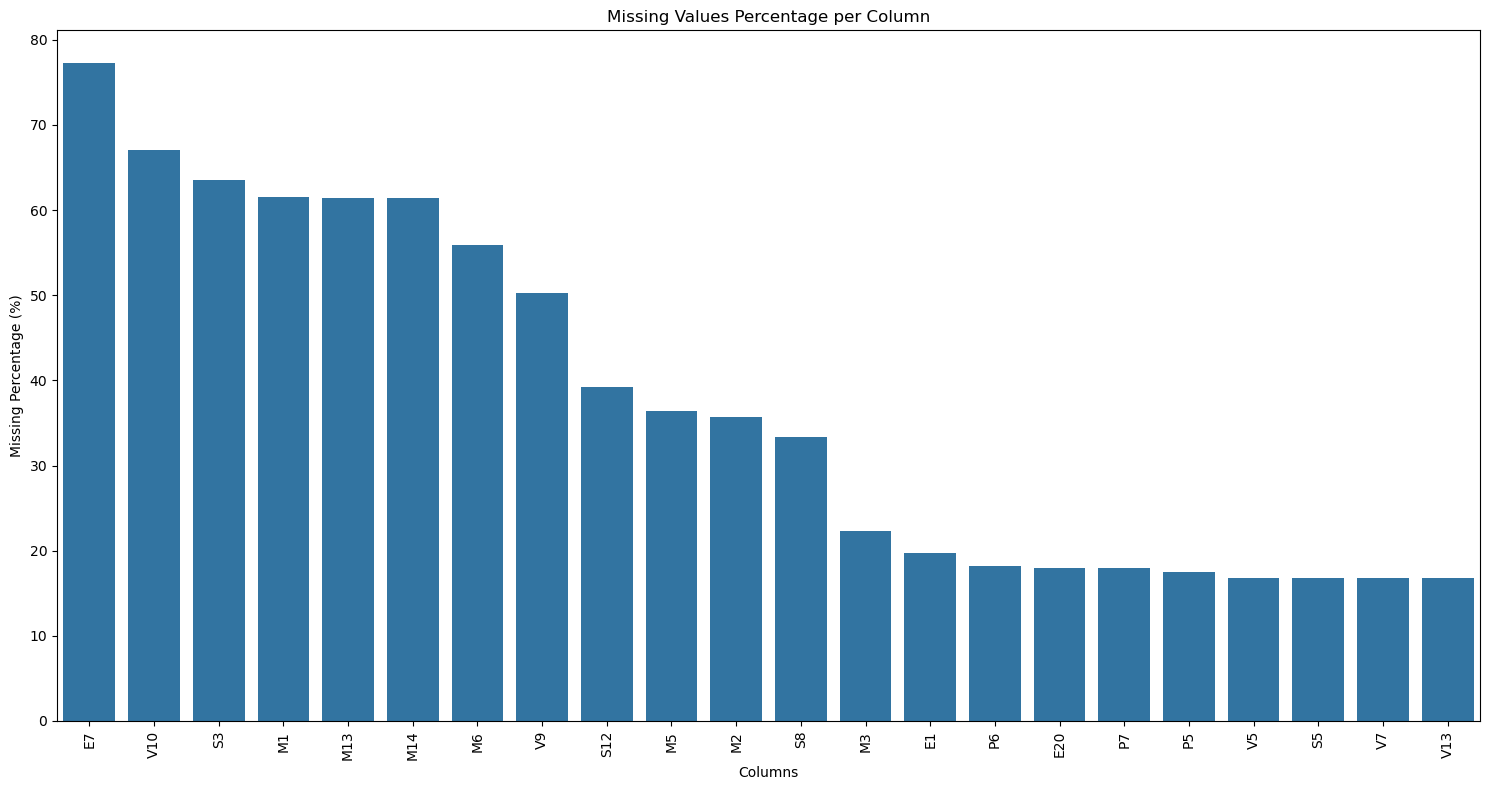

In [41]:
miss_value_perc_formatted = miss_value_perc.round(4).sort_values(ascending=False)
miss_value_perc11 = miss_value_perc_formatted[miss_value_perc_formatted>12]
plt.figure(figsize=(15,8))
sns.barplot(x=miss_value_perc11.index,y=miss_value_perc11.values)

plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Values Percentage per Column")

plt.tight_layout()
plt.show()


In [44]:

# Analyze feature groups
feature_groups = {
    'Market': [col for col in train.columns if col.startswith('M')],
    'Economic': [col for col in train.columns if col.startswith('E')],
    'Interest': [col for col in train.columns if col.startswith('I')],
    'Price': [col for col in train.columns if col.startswith('P')],
    'Volatility': [col for col in train.columns if col.startswith('V')],
    'Sentiment': [col for col in train.columns if col.startswith('S')],
    'Dummy': [col for col in train.columns if col.startswith('D')],
}

print("\nFeature group counts:")
for group, cols in feature_groups.items():
    print(f"  {group:12s}: {len(cols):3d} features")


Feature group counts:
  Market      :  18 features
  Economic    :  20 features
  Interest    :   9 features
  Price       :  13 features
  Volatility  :  13 features
  Sentiment   :  12 features
  Dummy       :   9 features


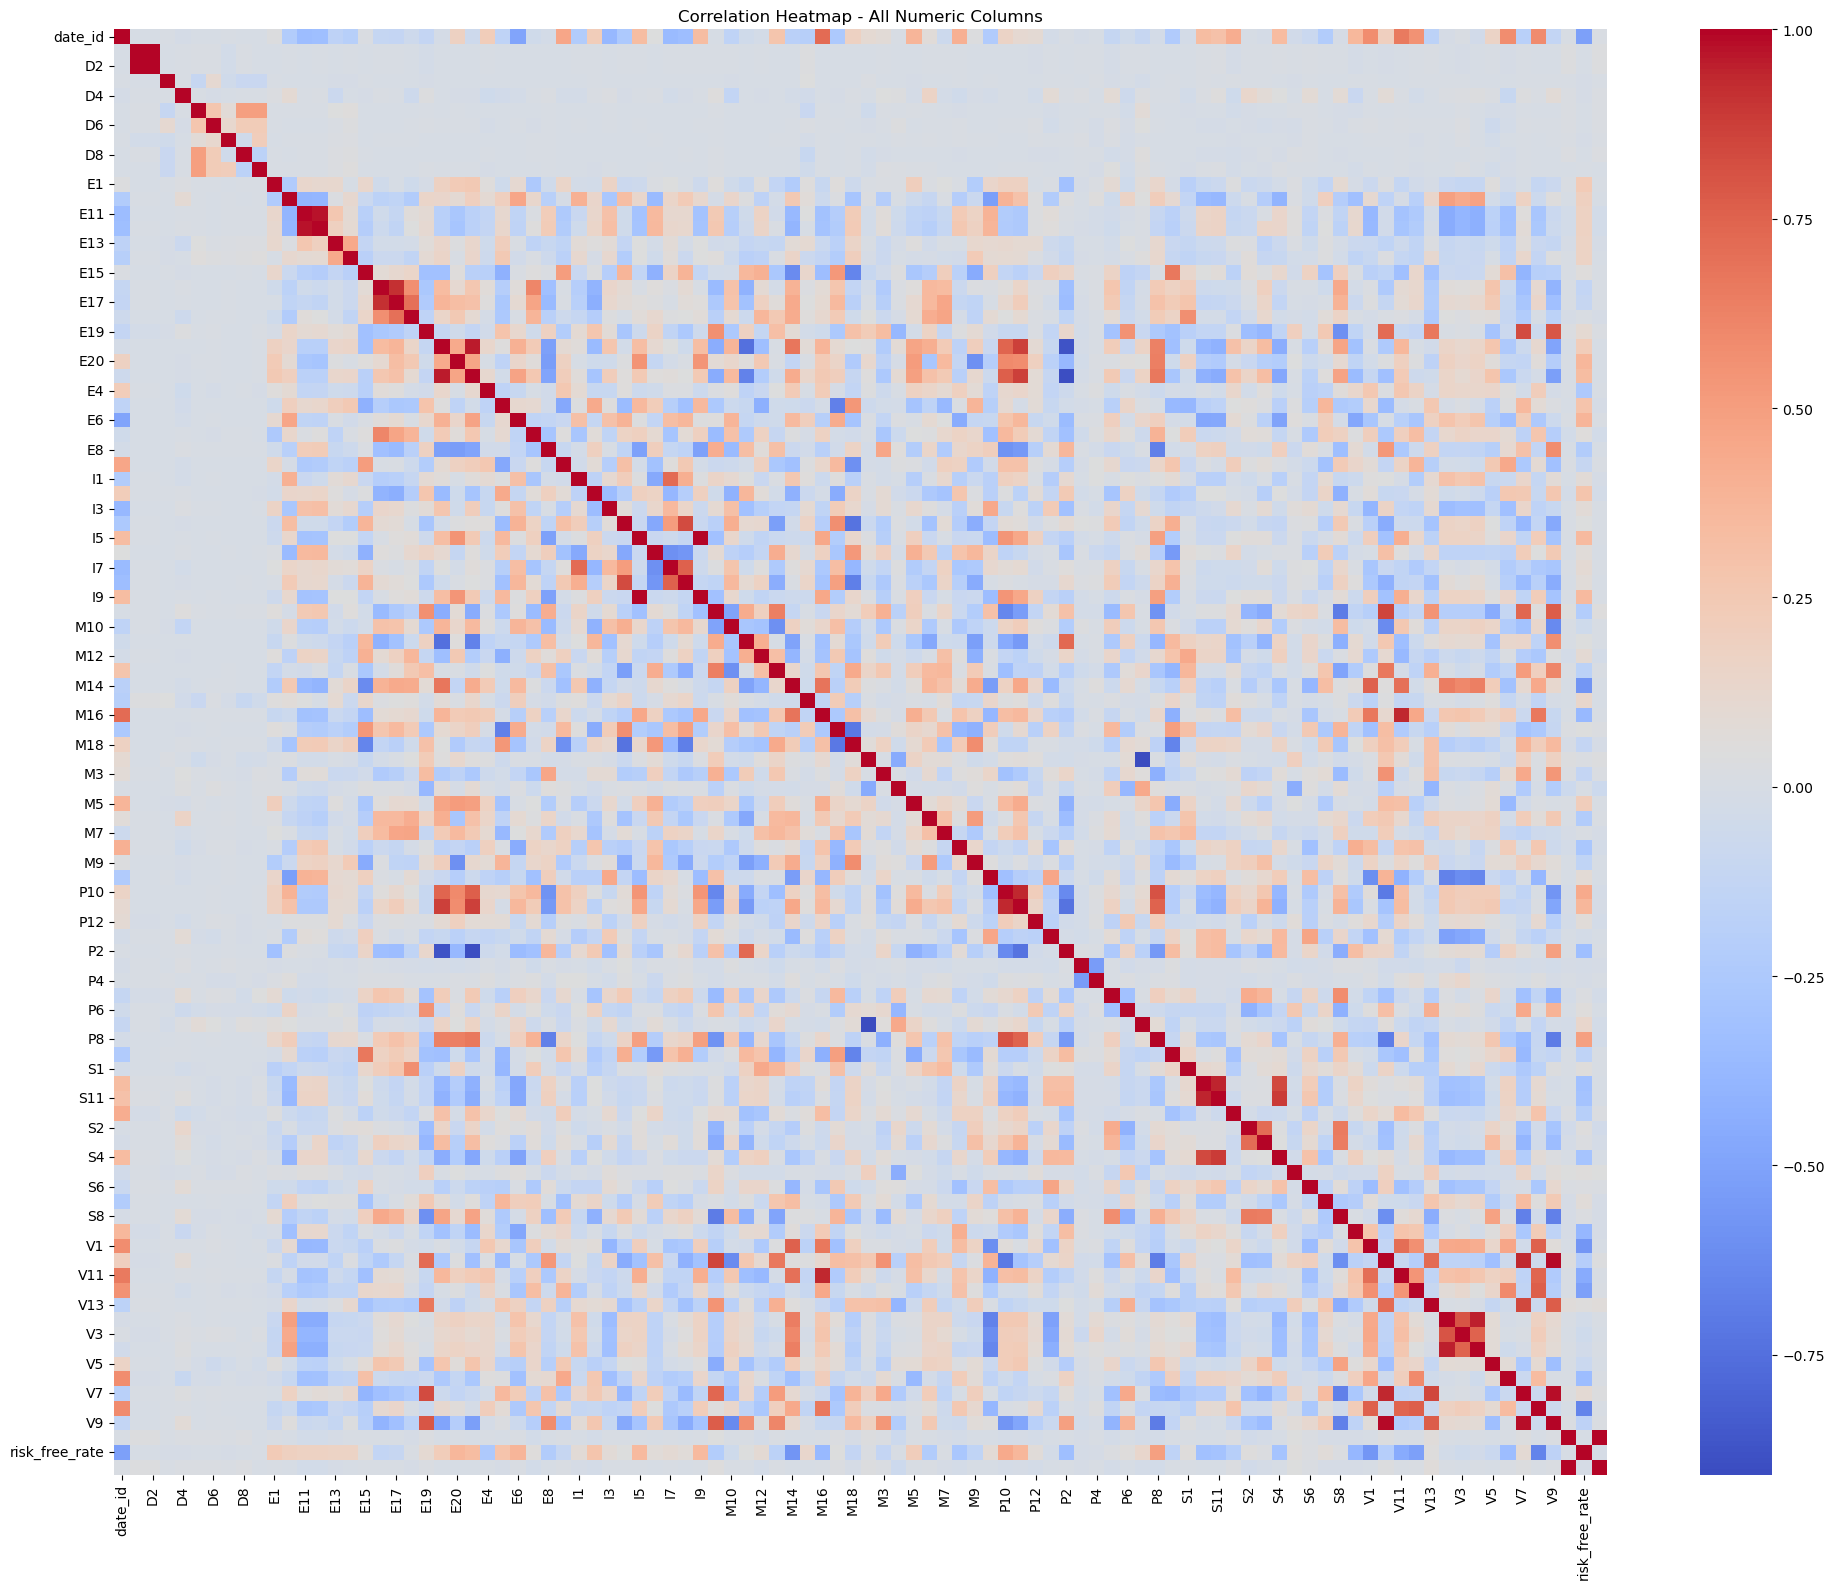

In [69]:
plt.figure(figsize=(20,16))
sns.heatmap(train.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap - All Numeric Columns")
plt.tight_layout()
plt.show()